In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt




In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)
     

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


NameError: name 'X_train' is not defined

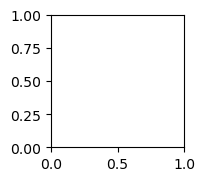

In [1]:
import matplotlib.pyplot as plt

# Define class labels for Fashion MNIST
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Display a few images along with their labels
plt.figure(figsize=(10, 10))
for i in range(25):  # Change this number to display more or fewer images
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='grey')  # Displaying grayscale images
    plt.title(class_labels[y_train[i]])
    plt.axis('off')
plt.show()


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))

# Adding maxpooling layer to get max value within a matrix
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))
     

In [22]:
model

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
______________________________________________

In [24]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [26]:

(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
model.fit(train_x.astype(np.float32), train_y.astype(np.float32), epochs = 5, validation_split = 0.2)
     

Epoch 1/5


2024-04-22 18:03:05.595157: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1500/1500 [==============================] - 16s 10ms/step - loss: 0.9375 - accuracy: 0.8514 - val_loss: 0.3225 - val_accuracy: 0.8875
Epoch 2/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2797 - accuracy: 0.8981 - val_loss: 0.3039 - val_accuracy: 0.8923
Epoch 3/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2385 - accuracy: 0.9116 - val_loss: 0.3039 - val_accuracy: 0.8956
Epoch 4/5
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2191 - accuracy: 0.9204 - val_loss: 0.3640 - val_accuracy: 0.8867
Epoch 5/5
1500/1500 [==============================] - 17s 12ms/step - loss: 0.1988 - accuracy: 0.9243 - val_loss: 0.3480 - val_accuracy: 0.8891


In [27]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

     

313/313 [==============================] - 1s 3ms/step - loss: 0.3708 - accuracy: 0.8820
Test Accuracy: 0.8820000290870667


In [33]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

     

Epoch 1/10
375/375 [==============================] - 12s 31ms/step - loss: 0.0545 - accuracy: 0.9804 - val_loss: 0.6035 - val_accuracy: 0.8961
Epoch 2/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0456 - accuracy: 0.9834 - val_loss: 0.6146 - val_accuracy: 0.8990
Epoch 3/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0445 - accuracy: 0.9842 - val_loss: 0.6669 - val_accuracy: 0.8939
Epoch 4/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0428 - accuracy: 0.9851 - val_loss: 0.7357 - val_accuracy: 0.8884
Epoch 5/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0457 - accuracy: 0.9834 - val_loss: 0.7191 - val_accuracy: 0.8964
Epoch 6/10
375/375 [==============================] - 11s 30ms/step - loss: 0.0345 - accuracy: 0.9880 - val_loss: 0.7408 - val_accuracy: 0.8973
Epoch 7/10
375/375 [==============================] - 11s 31ms/step - loss: 0.0360 - accuracy: 0.9873 - val_loss: 0.8187 - val_accuracy:

In [35]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 1s 4ms/step - loss: 0.8943 - accuracy: 0.8966
Test Accuracy: 0.8966000080108643


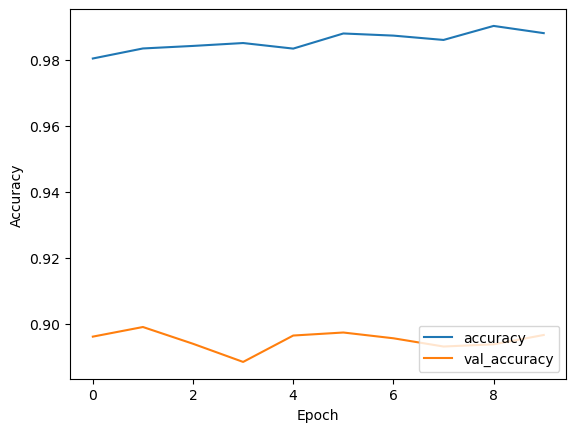

In [36]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()